**Setup Python 3.8 on Colab Environment.**

In [1]:
!sudo apt-get update -y
!sudo apt-get install python3.8
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 2
!python --version
!sudo apt-get install python3-pip
!python -m pip install --upgrade pip
!pip install ipykernel

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [76.8 kB]
Hit:13 http://ppa.launchpad.net/cran/

**Installing OpeNTF**

In [2]:
%rm -R opentf/
!git clone https://github.com/fani-lab/opentf
%cd opentf/
!pip install -r requirements.txt
%cd src/

rm: cannot remove 'opentf/': No such file or directory
Cloning into 'opentf'...
remote: Enumerating objects: 3142, done.
remote: Counting objects: 100% (3142/3142), done.
remote: Compressing objects: 100% (2223/2223), done.
remote: Total 3142 (delta 1372), reused 2473 (delta 876), pack-reused 0
Receiving objects: 100% (3142/3142), 34.51 MiB | 16.69 MiB/s, done.
Resolving deltas: 100% (1372/1372), done.
/content/opentf
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 881.9/881.9 MB 145.9 MB/s eta 0:00:01tcmalloc: large alloc 1102422016 bytes == 0x384fc000 @  0x7faea061d615 0x4f69ad 0x5aa051 0x5a9f83 0x5d290c 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd 0x556ea9 0x4fa54a 0x556ea9 0x555bc0 0x4fa5dd 0x557802 0x555bc0 0x4fa5dd 0x556ea9 0x555bc0 0x4fa5dd
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.2/27.2 MB 45.8 MB/s eta 0:0

/content/opentf/src


**Default Hyperparameters**

In [3]:
!cat param.py

import random
import torch
import numpy as np

random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)

np.random.seed(0)

settings = {
    'model':{
        'baseline': {
            'random': {
                'b': 4096
            },
            'fnn':{
                'l': [100],  # list of number of nodes in each layer
                'lr': 0.1,  # learning rate
                'b': 4096,  # batch size
                'e': 20,  # epoch
                'nns': None,  # number of negative samples
                'ns': None,  # 'uniform', 'unigram', 'unigram_b'
            },
            'bnn':{
                'l': [100],  # list of number of nodes in each layer
                'lr': 0.1,  # learning rate
                'b': 4096,  # batch size
                'e': 20,  # epoch
                'nns': None,  # number of negative samples
                'ns': None,  # 'uniform', 'unigram', 'unigram_b'
                's': 1  # # sample_elbo for bnn
            },
           

**Clearing Cache Pickles for Teams Sparce Matrix if Exist`(Optional)`**

In [4]:
!rm -R ../data/preprocessed/dblp/toy.dblp.v12.json/

**Benchmark on Toy subset of DBLP for non-Bayesian Feedforward (fnn) and Bayesian (bnn) Models**

In [5]:
!python main.py -data ../data/raw/dblp/toy.dblp.v12.json -domain dblp -model fnn bnn

Loading sparse matrices from ./../data/preprocessed/dblp/toy.dblp.v12.json/teamsvecs.pkl ...
File not found! Generating the sparse matrices ...
Loading indexes pickle from ./../data/preprocessed/dblp/toy.dblp.v12.json/indexes.pkl ...
Pickles not found! Reading raw data from ../data/raw/dblp/toy.dblp.v12.json (progress in bytes) ...
  0% 0/46630 [00:00<?, ?it/s]JSONDecodeError: There has been error in loading json line `[
`!
Expecting value: line 2 column 1 (char 2)
JSONDecodeError: There has been error in loading json line `]`!
Expecting value: line 1 column 1 (char 0)
100% 46606/46630 [00:00<00:00, 4298336.17it/s]
It took 0.0008096694946289062 seconds to pickle the data into ./../data/preprocessed/dblp/toy.dblp.v12.json
It took 0.059862613677978516 seconds to generate and store the sparse matrices of size (31, 25) at ./../data/preprocessed/dblp/toy.dblp.v12.json/teamsvecs.pkl
Fold 0/2, Epoch 0/19, Minibatch 0/0, Phase train, Running Loss train 196.965576171875, Time 0.0108540058135986

**Benchmark Output Folder on toy.dblp for Baselines**

In [6]:
!ls ../output/toy.dblp.v12.json/

bnn  bnn_emb  fnn  fnn_emb  random


**Let's look at the Bayesian Results**

{\#team:30, \#skills:11, \#members:12, layers:\[100\], learning rate:0.1, batch size:4096, epoch:20, elbo samples:1\}

In [7]:
!ls ../output/toy.dblp.v12.json/bnn/t31.s11.m13.l[100].lr0.1.b4096.e20.s1

f0.test.pred		    state_dict_model.f1.e15.pt
f0.test.pred.eval.mean.csv  state_dict_model.f1.e16.pt
f0.test.pred.eval.roc.pkl   state_dict_model.f1.e17.pt
f0.train_valid_loss.png     state_dict_model.f1.e18.pt
f1.test.pred		    state_dict_model.f1.e19.pt
f1.test.pred.eval.mean.csv  state_dict_model.f1.e1.pt
f1.test.pred.eval.roc.pkl   state_dict_model.f1.e2.pt
f1.train_valid_loss.png     state_dict_model.f1.e3.pt
f2.test.pred		    state_dict_model.f1.e4.pt
f2.test.pred.eval.mean.csv  state_dict_model.f1.e5.pt
f2.test.pred.eval.roc.pkl   state_dict_model.f1.e6.pt
f2.train_valid_loss.png     state_dict_model.f1.e7.pt
state_dict_model.f0.e0.pt   state_dict_model.f1.e8.pt
state_dict_model.f0.e10.pt  state_dict_model.f1.e9.pt
state_dict_model.f0.e11.pt  state_dict_model_f1.pt
state_dict_model.f0.e12.pt  state_dict_model.f2.e0.pt
state_dict_model.f0.e13.pt  state_dict_model.f2.e10.pt
state_dict_model.f0.e14.pt  state_dict_model.f2.e11.pt
state_dict_model.f0.e15.pt  state_dict_model.f2.e12.pt

**ROC Plot for 3-Fold Cross-Validated Models on Test Set**

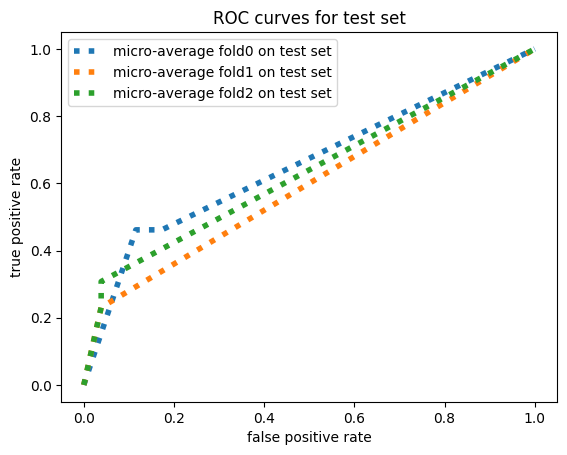

In [8]:
from IPython.display import Image
Image('../output/toy.dblp.v12.json/bnn/t31.s11.m13.l[100].lr0.1.b4096.e20.s1/test.roc.png')

In [9]:
import pandas as pd
pd.read_csv('../output/toy.dblp.v12.json/bnn/t31.s11.m13.l[100].lr0.1.b4096.e20.s1/test.pred.eval.mean.csv', index_col = 0)

,mean
P_2,0.366667
P_5,0.240000
P_10,0.206667
recall_2,0.266667
recall_5,0.466667
recall_10,0.816667
ndcg_cut_2,0.434555
ndcg_cut_5,0.452790
ndcg_cut_10,0.606835
map_cut_2,0.266667
